In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [108]:
path_db = '../db/filmes.db'

engine = create_engine(f'sqlite:///{path_db}')

In [109]:
df = pd.read_sql('SELECT * from filmes', con=engine)
df

,id,title,original_title,original_language,overview,budget,revenue,runtime,release_date,genres,popularity,vote_average,vote_count,num_genres,release_year
0,411405,Small Crimes,Small Crimes,en,"A disgraced former cop, fresh off a six-year p...",8.201666e+06,4.243626e+06,95.0,2017-04-28 00:00:00.000000,"['Drama', 'Comedy', 'Thriller', 'Crime']",7.219022,5.8,55.0,4,2017.0
1,42492,Up the Sandbox,Up the Sandbox,en,"A young wife and mother, bored with day-to-day...",3.543621e+05,2.978317e+06,97.0,1972-12-21 00:00:00.000000,"['Drama', 'Comedy']",0.138450,7.3,2.0,2,1972.0
2,12143,Bad Lieutenant,Bad Lieutenant,en,"While investigating a young nun's rape, a corr...",1.000000e+06,2.019469e+06,96.0,1992-09-16 00:00:00.000000,"['Crime', 'Drama']",6.417037,6.9,162.0,2,1992.0
3,9976,Satan's Little Helper,Satan's Little Helper,en,A naïve young boy unknowingly becomes the pawn...,1.890390e+06,1.710526e+06,100.0,2004-01-01 00:00:00.000000,"['Horror', 'Romance', 'Comedy']",2.233189,5.0,42.0,3,2004.0
4,46761,Sitcom,Sitcom,fr,The adventures of an upper-class suburban fami...,8.550376e+05,2.725346e+06,80.0,1998-05-27 00:00:00.000000,"['Comedy', 'Drama', 'Thriller']",1.800582,6.4,27.0,3,1998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,3093,Basic Instinct 2,Basic Instinct 2,en,Novelist Catherine Tramell is once again in tr...,7.000000e+07,3.862948e+07,114.0,2006-03-29 00:00:00.000000,"['Crime', 'Mystery', 'Thriller']",15.321902,4.6,183.0,3,2006.0
4994,246127,Every Thing Will Be Fine,Every Thing Will Be Fine,en,"One day, driving aimlessly around the outskirt...",9.853274e+06,8.034000e+03,118.0,2015-04-02 00:00:00.000000,['Drama'],5.723103,5.3,79.0,1,2015.0
4995,9803,Seven Dwarfs,7 Zwerge - Männer allein im Wald,de,The Seven Dwarves live deep within a female-fr...,9.674091e+06,1.694475e+06,95.0,2004-10-28 00:00:00.000000,['Comedy'],4.582736,5.2,70.0,1,2004.0
4996,336970,True Siblings,Syskonsalt,sv,"The siblings Linus, 19-years-old, who are taki...",1.060106e+06,4.436564e+06,58.0,2000-09-13 00:00:00.000000,"['Drama', 'TV Movie']",2.364355,8.0,2.0,2,2000.0


In [110]:
df['sucesso'] = df.apply(lambda x: 1 if x['revenue'] > x['budget'] else 0, axis=1)
df

,id,title,original_title,original_language,overview,budget,revenue,runtime,release_date,genres,popularity,vote_average,vote_count,num_genres,release_year,sucesso
0,411405,Small Crimes,Small Crimes,en,"A disgraced former cop, fresh off a six-year p...",8.201666e+06,4.243626e+06,95.0,2017-04-28 00:00:00.000000,"['Drama', 'Comedy', 'Thriller', 'Crime']",7.219022,5.8,55.0,4,2017.0,0
1,42492,Up the Sandbox,Up the Sandbox,en,"A young wife and mother, bored with day-to-day...",3.543621e+05,2.978317e+06,97.0,1972-12-21 00:00:00.000000,"['Drama', 'Comedy']",0.138450,7.3,2.0,2,1972.0,1
2,12143,Bad Lieutenant,Bad Lieutenant,en,"While investigating a young nun's rape, a corr...",1.000000e+06,2.019469e+06,96.0,1992-09-16 00:00:00.000000,"['Crime', 'Drama']",6.417037,6.9,162.0,2,1992.0,1
3,9976,Satan's Little Helper,Satan's Little Helper,en,A naïve young boy unknowingly becomes the pawn...,1.890390e+06,1.710526e+06,100.0,2004-01-01 00:00:00.000000,"['Horror', 'Romance', 'Comedy']",2.233189,5.0,42.0,3,2004.0,0
4,46761,Sitcom,Sitcom,fr,The adventures of an upper-class suburban fami...,8.550376e+05,2.725346e+06,80.0,1998-05-27 00:00:00.000000,"['Comedy', 'Drama', 'Thriller']",1.800582,6.4,27.0,3,1998.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,3093,Basic Instinct 2,Basic Instinct 2,en,Novelist Catherine Tramell is once again in tr...,7.000000e+07,3.862948e+07,114.0,2006-03-29 00:00:00.000000,"['Crime', 'Mystery', 'Thriller']",15.321902,4.6,183.0,3,2006.0,0
4994,246127,Every Thing Will Be Fine,Every Thing Will Be Fine,en,"One day, driving aimlessly around the outskirt...",9.853274e+06,8.034000e+03,118.0,2015-04-02 00:00:00.000000,['Drama'],5.723103,5.3,79.0,1,2015.0,0
4995,9803,Seven Dwarfs,7 Zwerge - Männer allein im Wald,de,The Seven Dwarves live deep within a female-fr...,9.674091e+06,1.694475e+06,95.0,2004-10-28 00:00:00.000000,['Comedy'],4.582736,5.2,70.0,1,2004.0,0
4996,336970,True Siblings,Syskonsalt,sv,"The siblings Linus, 19-years-old, who are taki...",1.060106e+06,4.436564e+06,58.0,2000-09-13 00:00:00.000000,"['Drama', 'TV Movie']",2.364355,8.0,2.0,2,2000.0,1


In [111]:
df.columns

Index(['id', 'title', 'original_title', 'original_language', 'overview',
       'budget', 'revenue', 'runtime', 'release_date', 'genres', 'popularity',
       'vote_average', 'vote_count', 'num_genres', 'release_year', 'sucesso'],
      dtype='object')

In [112]:
features = ['budget', 'revenue', 'runtime', 'popularity', 'vote_average', 'vote_count', 'num_genres', 'release_year']

Depois de criada a coluna de labels e definida as features agora vamos treinar o modelo e fazer o Gridsearch a fim de obtermos os melhores parâmetros para o modelo de KNN.

In [113]:
def modelo_knn(df, features, coluna_alvo):
    
    valido = ~df[features].isna().any(axis=1) & (df[coluna_alvo].isin({0, 1}))
    
    X = df.loc[valido, features]
    y = df.loc[valido, coluna_alvo]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    pipeline = Pipeline([('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)), ('model', KNeighborsClassifier(n_neighbors=5))])
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    param_grid = {
            'model__n_neighbors': list(range(1, 21)),
            'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
    
    grid_search_knn = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='accuracy',
        cv=skf,
        n_jobs=-1,
        verbose=2
    )
    
    grid_search_knn.fit(X_train, y_train)
    
    print(f'Melhor acuracia (média): {grid_search_knn.best_score_}')
    
    best_model_knn = grid_search_knn.best_estimator_
    best_model_knn.fit(X_train, y_train)
    
    y_pred = best_model_knn.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    
    return {'bm': best_model_knn,
            'gs': grid_search_knn}

In [114]:
modelo_knn = modelo_knn(df, features, 'sucesso')
modelo_knn

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Melhor acuracia (média): 0.8123829702231058
              precision    recall  f1-score   support

           0       0.60      0.75      0.67       259
           1       0.90      0.82      0.86       718

    accuracy                           0.80       977
   macro avg       0.75      0.79      0.76       977
weighted avg       0.82      0.80      0.81       977



{'bm': Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                 ('model', KNeighborsClassifier(n_neighbors=3))]),
 'gs': GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                        ('smote', SMOTE(random_state=42)),
                                        ('model', KNeighborsClassifier())]),
              n_jobs=-1,
              param_grid={'model__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                               'brute'],
                          'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                 11, 12, 13, 14, 15, 16, 17, 18,
                                                 19, 20]},
              scoring='accuracy', verbose=2)}

Vemos, portanto, que os melhores hiperparâmetros para o modelo de KNN são para `k = 3`

In [125]:
def analise_k_knn(df, features, coluna_alvo):
    
    valido = ~df[features].isna().any(axis=1) & (df[coluna_alvo].isin({0, 1}))
    
    X = df.loc[valido, features]
    y = df.loc[valido, coluna_alvo]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    k_range = range(1, 21)
    accuracy_means = []
    
    for k in k_range:
        pipeline = Pipeline([('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)), ('model', KNeighborsClassifier(n_neighbors=k))])
        scores = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring='accuracy', n_jobs=-1)
        accuracy_means.append(scores.mean())
    
    plt.figure(figsize=(10,12))
    plt.plot(k_range, accuracy_means, marker='o', color='blue')
    plt.title('Variância da acuracia média em função de k')
    plt.xlabel('k vizinhos')
    plt.ylabel('acurácia média')
    plt.grid(True)
    plt.show()
    
    k_best = k_range[np.argmax(accuracy_means)]
    print(f'Melhor k: {k_best} com acurácia média de {max(accuracy_means):.4f}')
    
    return {'k_best': k_best,
            'acurácias': accuracy_means}

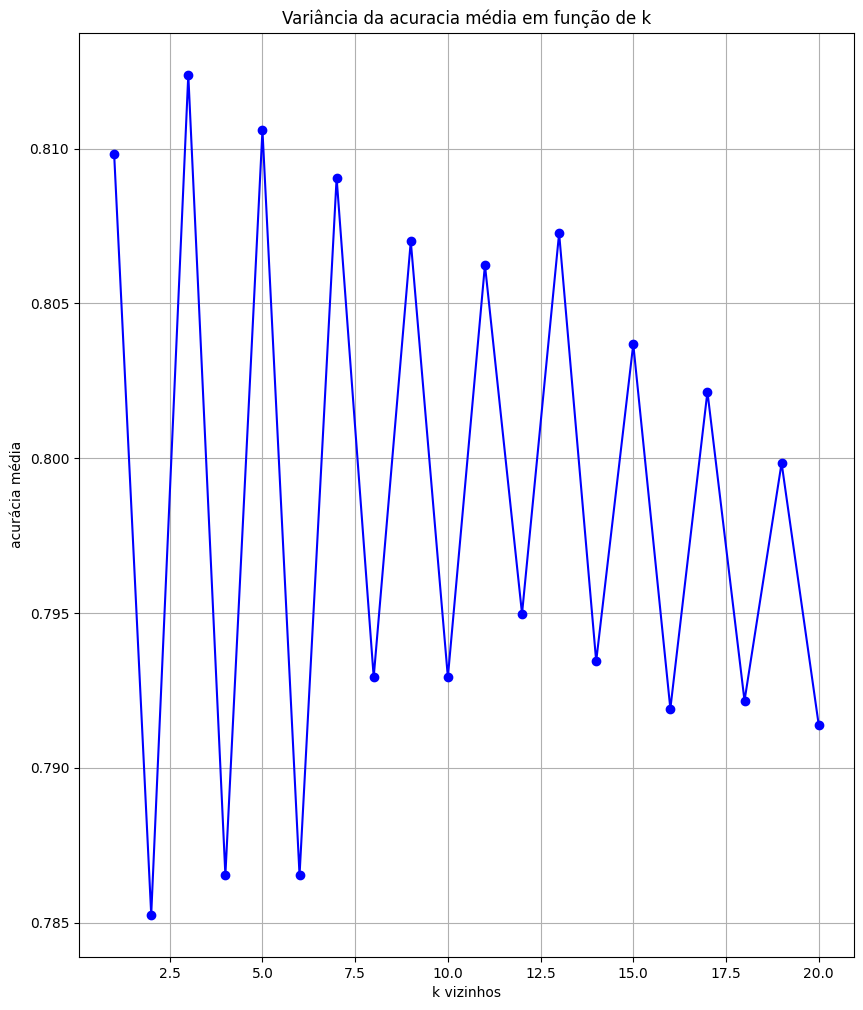

Melhor k: 3 com acurácia média de 0.8124


{'k_best': 3,
 'acurácias': [0.8098290276417865,
  0.785254657449463,
  0.8123829702231058,
  0.7865321199459019,
  0.8105900691290266,
  0.7865301551227851,
  0.8090512851580536,
  0.7929272917205628,
  0.8070052493524271,
  0.7929282741321212,
  0.806237985925317,
  0.7949766022313841,
  0.8072632961217666,
  0.7934417479066448,
  0.8036801136977644,
  0.7919068935819051,
  0.8021429670793886,
  0.7921642854102059,
  0.799843469091695,
  0.7913970219830959]}

In [126]:
analise_k = analise_k_knn(df, features, 'sucesso')
analise_k


No contexto de viés e variância percebemos que, para `k = 3`, há um equilíbrio entre essas duas grandezas. Logo, o modelo generaliza bem para novos dados, visto que a acurácia de teste no treinamento final do modelo é de `0.80` bem proxima do que a média de acurácia de `0.8124` no cross-validation. Já para `k < 3` embora acurácia seja alta não generaliza tão bem quando para `k=3` o que significa que o modelo está se adequando muito aos dados de treinamento gerando alta variância (__overfitting__). Para `k > 3` temos uma queda de acurácia e generalização do modelo, o que significa que o modelo está suavizando e desconsiderando nuances locais, gerando um viés cada vez maior (__underfitting__).